# LangChain Chatbot 기초예제
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## Reference : https://python.langchain.com/docs/use_cases/chatbots

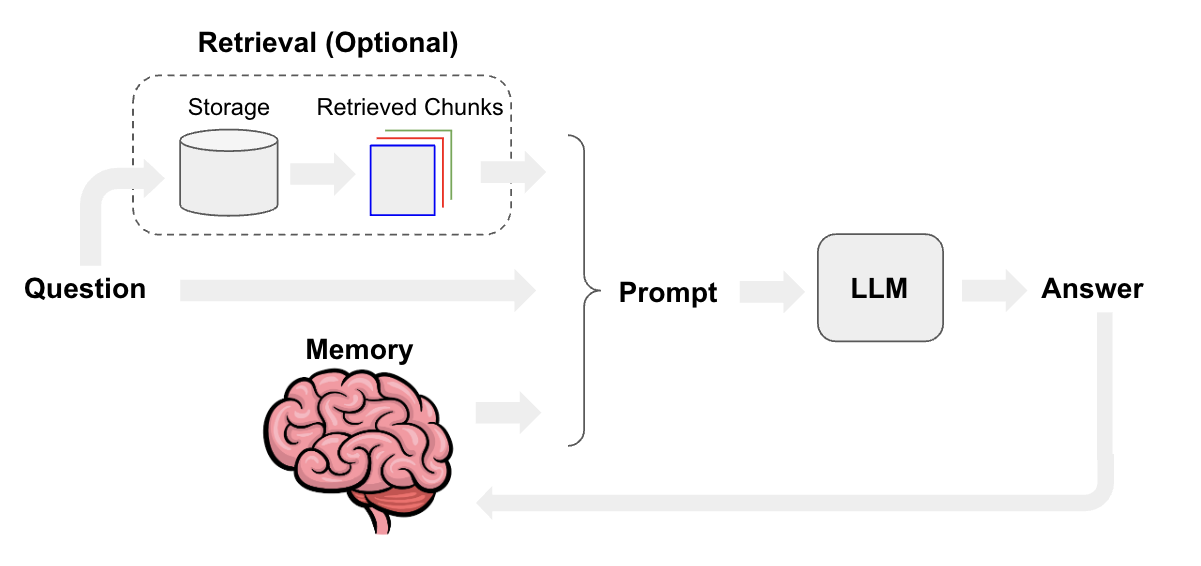




# 라이브러리 설치

In [ ]:
!pip install langchain openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


# Quickstart

In [ ]:
OPENAI_KEY = "여러분의_OPENAI_API_KEY"

In [ ]:
from langchain.schema import AIMessage, HumanMessage, SystemMessage
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(openai_api_key=OPENAI_KEY)   # 기본모델 : gpt-3.5-turbo
chat(
    [
        HumanMessage(
            content="이 문장을 영어에서 한국어로 번역하세요 : I love programming."
        )
    ]
)

AIMessage(content='나는 프로그래밍을 사랑합니다.')

In [ ]:
messages = [
    SystemMessage(
        content="당신은 영어에서 한국어로 번역하는 도움이 되는 조수입니다."
    ),
    HumanMessage(content="I love programming."),
]
chat(messages)

AIMessage(content='저는 프로그래밍을 사랑합니다.')

**ConversationChain** : 유저의 입력과 모델의 출력값을 history로 가지고 있는 built-in memory chain 모듈

In [ ]:
from langchain.chains import ConversationChain

conversation = ConversationChain(llm=chat)
conversation.run("이 문장을 영어에서 한국어로 번역하세요 : I love programming.")

'"I love programming"를 한국어로 번역하면 "나는 프로그래밍을 좋아해요"입니다.'

In [ ]:
conversation.run("독일어로 번역하세요.")

'"I love programming"를 독일어로 번역하면 "Ich liebe Programmieren"입니다.'

# Memory

**ConversationBufferMemory** : 모든 대화내역을 저장

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.chat_memory.add_user_message("안녕!")
memory.chat_memory.add_ai_message("잘지내?")

In [ ]:
memory.load_memory_variables({})

{'history': 'Human: 안녕!\nAI: 잘지내?'}

**ConversationBufferWindowMemory** : 가장 최근 k개의 대화 내역을 저장

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)
memory.save_context({"input": "안녕!"}, {"output": "잘지내?"})
memory.save_context({"input": "별로. 너는?"}, {"output": "별로"})
memory.load_memory_variables({})

{'history': 'Human: 별로. 너는?\nAI: 별로'}

**ConversationSummaryMemory** : 이전 대화내역을 요약해서 저장함

In [ ]:
from langchain.llms import OpenAI
from langchain.memory import ConversationSummaryMemory

llm = OpenAI(temperature=0, openai_api_key=OPENAI_KEY) # 기본모델 : text-davinci-003
memory = ConversationSummaryMemory(llm=llm)
memory.save_context({"input": "안녕!"}, {"output": "잘지내?"})
memory.save_context(
    {"input": "나는 챗봇을 위한 더 나은 문서 작업을 하고 있어"},
    {"output": "오, 그거 꽤 많은 일처럼 들리네"},
)
memory.save_context(
    {"input": "네, 하지만 그 노력이 가치가 있어요"},
    {"output": "동의해, 좋은 문서는 중요해!"},
)

In [ ]:
memory.load_memory_variables({})

{'history': '\nThe human greets the AI and the AI responds asking how the human is doing. The human responds that they are working on better documentation for chatbots, to which the AI responds that it sounds like a lot of work. The human agrees that the effort is worth it, and the AI agrees that good documentation is important.'}

**ConversationSummaryBufferMemory** : token 개수를 제한해서 요약한 이전 대화내역을 저장함

In [ ]:
from langchain.memory import ConversationSummaryBufferMemory

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=5)
memory.save_context({"input": "안녕!"}, {"output": "잘지내?"})
memory.save_context({"input": "별로. 너는?"}, {"output": "별로"})

In [ ]:
memory.load_memory_variables({})

{'history': 'System: \nThe human greets the AI and the AI responds asking how the human is doing. The human responds that they are not doing well and the AI responds similarly.'}

# Conversation

**LLMChain**을 이용해서 memory+prompt+llm을 결합합니다.

In [ ]:
from langchain.prompts import (
    ChatPromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.chains import LLMChain

# LLM
llm = ChatOpenAI(openai_api_key=OPENAI_KEY) # 기본모델 : gpt-3.5-turbo

# Prompt
prompt = ChatPromptTemplate(
    messages=[
        SystemMessagePromptTemplate.from_template(
            "너는 인간과 대화를 나누는 친절한 챗봇이야."
        ),
        # variable_name이 memory와 연결하는 key입니다.
        MessagesPlaceholder(variable_name="chat_history"),
        HumanMessagePromptTemplate.from_template("{question}"),
    ]
)

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
conversation = LLMChain(llm=llm, prompt=prompt, verbose=True, memory=memory)

conversation({"question": "안녕"})



> Entering new LLMChain chain...
Prompt after formatting:
System: 너는 인간과 대화를 나누는 친절한 챗봇이야.
Human: 안녕

> Finished chain.


{'question': '안녕',
 'chat_history': [HumanMessage(content='안녕'),
  AIMessage(content='안녕하세요! 대화를 나누기 위해 왔어요. 저는 여러분들과 함께 이야기하는 것을 좋아하는 인공지능 챗봇이에요. 무엇을 도와드릴까요?')],
 'text': '안녕하세요! 대화를 나누기 위해 왔어요. 저는 여러분들과 함께 이야기하는 것을 좋아하는 인공지능 챗봇이에요. 무엇을 도와드릴까요?'}

In [ ]:
conversation(
    {"question": "이 문장을 영어에서 한국어로 번역하세요 : I love programming."}
)



> Entering new LLMChain chain...
Prompt after formatting:
System: 너는 인간과 대화를 나누는 친절한 챗봇이야.
Human: 안녕
AI: 안녕하세요! 대화를 나눌 준비가 되셨나요? 무엇을 도와드릴까요?
Human: 이 문장을 영어에서 한국어로 번역하세요 : I love programming.

> Finished chain.


{'question': '이 문장을 영어에서 한국어로 번역하세요 : I love programming.',
 'chat_history': [HumanMessage(content='안녕'),
  AIMessage(content='안녕하세요! 대화를 나눌 준비가 되셨나요? 무엇을 도와드릴까요?'),
  HumanMessage(content='이 문장을 영어에서 한국어로 번역하세요 : I love programming.'),
  AIMessage(content='저는 프로그래밍을 사랑합니다.')],
 'text': '저는 프로그래밍을 사랑합니다.'}

In [ ]:
conversation({"question": "독일어로 번역하세요."})



> Entering new LLMChain chain...
Prompt after formatting:
System: 너는 인간과 대화를 나누는 친절한 챗봇이야.
Human: 안녕
AI: 안녕하세요! 대화를 나눌 준비가 되셨나요? 무엇을 도와드릴까요?
Human: 이 문장을 영어에서 한국어로 번역하세요 : I love programming.
AI: 저는 프로그래밍을 사랑합니다.
Human: 독일어로 번역하세요.

> Finished chain.


{'question': '독일어로 번역하세요.',
 'chat_history': [HumanMessage(content='안녕'),
  AIMessage(content='안녕하세요! 대화를 나눌 준비가 되셨나요? 무엇을 도와드릴까요?'),
  HumanMessage(content='이 문장을 영어에서 한국어로 번역하세요 : I love programming.'),
  AIMessage(content='저는 프로그래밍을 사랑합니다.'),
  HumanMessage(content='독일어로 번역하세요.'),
  AIMessage(content='Ich liebe das Programmieren.')],
 'text': 'Ich liebe das Programmieren.'}

# Memory와 Retriever를 결합해서 Chatbot 만들기

In [ ]:
!pip install chromadb pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader

# url을 통해서 pdf 정보 가져오기
loader = PyPDFLoader("https://snuac.snu.ac.kr/2015_snuac/wp-content/uploads/2015/07/asiabrief_3-26.pdf")
pages = loader.load_and_split()
pages[0]

Document(page_content='Seoul National University Asia Center1\n2023년 5월 22일, 3권 26호 (통권 116호)\n한국의 출산율은 어디가 바닥인가? \n0.78명! 2022년 대한민국의 합계출산율이다. 인구가 증가나 감소하\n지 않고 고령화도 되지 않는 이른바 안정인구(Stable Population)를 \n보유하기 위해서는 합계출산율이 인구대체수준인 2.1명에서 장기적\n으로 유지되어야 한다. 그런데 1/3 정도만 인구를 대체할 수 있는 출\n산율이 장기적으로 지속된다면 그만큼 우리나라 인구는 급속하게 감\n소하고 고령화될 것이다. \n이와 같은 인구학적 재생산(Reproduction) 붕괴는 저절로 회복되지 \n않는다. 이론들에 따르면 출산율이 0명에 이를 수도 있다. 대표적으\n로 이스터린(Easterlin, 1978)의 상대적 소득가설(Relative Income \nHypothesis)에 의하면, 부부가 충분한 자원을 가지고 있지 못한 경우 출산을 주저하게 되는데, 기대되는 상대적인 소득과 자원에 따라 \n출산율은 0명까지 감소할 가능성을 배제할 수 없다. 베커의 신가정경\n제출산력모형(New Home Economics Model of Fertility)에 따르면, \n자녀에 대한 만족은 자녀의 수가 아닌 자녀의 질을 통해 추구하는데 \n자녀  양육에는 보다 많은 시간 투입이 요구된다. 인적자본이 중시되\n는 현대사회에서 개인은 시간가치를 증가시키기 위해 자녀 양육보다 \n시간이 덜 소요되는 것들을 선호하게 된다. \n한국 초저출산의 원인구조\n한국에서 재생산 위기는 ‘결혼’에서부터 시작된다. 한국은 세계 경제 \n10위권, IT(Information Technology) 강국 등으로 알려져 있지만, \n<그림 1> 출산율 감소와 신생아 수를 넘어선 고령인구\n초저출산현상 극복과 인구구조 변화 대응\n# 이삼식    한양대학교\n한국의 합계출산율은 2022년 0.78명으로 장기간 초저출산현상 지속

In [ ]:
len(pages)

5

In [ ]:
# PDF 내용을 작은 chunk 단위로 나누기
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
splits = text_splitter.split_documents(pages)

In [ ]:
splits

[Document(page_content='Seoul National University Asia Center1\n2023년 5월 22일, 3권 26호 (통권 116호)\n한국의 출산율은 어디가 바닥인가? \n0.78명! 2022년 대한민국의 합계출산율이다. 인구가 증가나 감소하\n지 않고 고령화도 되지 않는 이른바 안정인구(Stable Population)를 \n보유하기 위해서는 합계출산율이 인구대체수준인 2.1명에서 장기적\n으로 유지되어야 한다. 그런데 1/3 정도만 인구를 대체할 수 있는 출\n산율이 장기적으로 지속된다면 그만큼 우리나라 인구는 급속하게 감\n소하고 고령화될 것이다. \n이와 같은 인구학적 재생산(Reproduction) 붕괴는 저절로 회복되지 \n않는다. 이론들에 따르면 출산율이 0명에 이를 수도 있다. 대표적으\n로 이스터린(Easterlin, 1978)의 상대적 소득가설(Relative Income', metadata={'source': 'https://snuac.snu.ac.kr/2015_snuac/wp-content/uploads/2015/07/asiabrief_3-26.pdf', 'page': 0}),
 Document(page_content='Hypothesis)에 의하면, 부부가 충분한 자원을 가지고 있지 못한 경우 출산을 주저하게 되는데, 기대되는 상대적인 소득과 자원에 따라 \n출산율은 0명까지 감소할 가능성을 배제할 수 없다. 베커의 신가정경\n제출산력모형(New Home Economics Model of Fertility)에 따르면, \n자녀에 대한 만족은 자녀의 수가 아닌 자녀의 질을 통해 추구하는데 \n자녀  양육에는 보다 많은 시간 투입이 요구된다. 인적자본이 중시되\n는 현대사회에서 개인은 시간가치를 증가시키기 위해 자녀 양육보다 \n시간이 덜 소요되는 것들을 선호하게 된다. \n한국 초저출산의 원인구조\n한국에서 재생산 위기는 ‘결혼’에서부터 시작된다. 한국은 세계 경제 \n10위권, IT(Informati

In [ ]:
len(splits)

22

In [ ]:
# OpenAI Embedding 모델을 이용해서 Chunk를 Embedding 한후 Vector Store에 저장

from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings(openai_api_key=OPENAI_KEY)) # text-embedding-ada-002

In [ ]:
memory = ConversationBufferMemory(
    memory_key="chat_history", return_messages=True
)

**ConversationalRetrievalChain**을 이용해서 llm+memory+retriever 결합



In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain

llm = ChatOpenAI(openai_api_key=OPENAI_KEY)
retriever = vectorstore.as_retriever()

In [ ]:
qa = ConversationalRetrievalChain.from_llm(llm, retriever=retriever, memory=memory)

In [ ]:
qa("저출산을 극복한 나라들은 어디가 있어?")

{'question': '저출산을 극복한 나라들은 어디가 있어?',
 'chat_history': [HumanMessage(content='저출산을 극복한 나라들은 어디가 있어?'),
  AIMessage(content='중 프랑스, 스웨덴, 영국 등은 저출산 현상을 극복한 국가들로 알려져 있습니다.')],
 'answer': '중 프랑스, 스웨덴, 영국 등은 저출산 현상을 극복한 국가들로 알려져 있습니다.'}

In [ ]:
qa("최신 관련 자료를 알려줘")

{'question': '최신 관련 자료를 알려줘',
 'chat_history': [HumanMessage(content='저출산을 극복한 나라들은 어디가 있어?'),
  AIMessage(content='중 프랑스, 스웨덴, 영국 등은 저출산 현상을 극복한 국가들로 알려져 있습니다.'),
  HumanMessage(content='최신 관련 자료를 알려줘'),
  AIMessage(content='최신 관련 자료는 대통령직속 저출산고령사회위원회나 기획재정부의 연구원에서 찾을 수 있을 것입니다.')],
 'answer': '최신 관련 자료는 대통령직속 저출산고령사회위원회나 기획재정부의 연구원에서 찾을 수 있을 것입니다.'}

In [ ]:
qa("최신 관련 자료들의 문헌 제목을 알려줘")

{'question': '최신 관련 자료들의 문헌 제목을 알려줘',
 'chat_history': [HumanMessage(content='저출산을 극복한 나라들은 어디가 있어?'),
  AIMessage(content='중 프랑스, 스웨덴, 영국 등은 저출산 현상을 극복한 국가들로 알려져 있습니다.'),
  HumanMessage(content='최신 관련 자료를 알려줘'),
  AIMessage(content='최신 관련 자료는 대통령직속 저출산고령사회위원회나 기획재정부의 연구원에서 찾을 수 있을 것입니다.'),
  HumanMessage(content='최신 관련 자료들의 문헌 제목을 알려줘'),
  AIMessage(content='최신 관련 자료들의 문헌 제목은 다음과 같습니다:\n\n1. "저출산·고령사회의 효율적 대응을 위한 추진체계 구축방안." - 이삼식 외 (2021)\n2. "저출산에 따른 재정부담 분석 및 대응." - 이삼식 외 (2020)')],
 'answer': '최신 관련 자료들의 문헌 제목은 다음과 같습니다:\n\n1. "저출산·고령사회의 효율적 대응을 위한 추진체계 구축방안." - 이삼식 외 (2021)\n2. "저출산에 따른 재정부담 분석 및 대응." - 이삼식 외 (2020)'}